In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
import PIL
import numpy as np
import PIL.Image
import time
import functools
import os
import scipy
import time
import matplotlib.image as mpimg

In [0]:
from google.colab import drive
drive.mount("/content/drive")


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
trainer = drive.CreateFile({'id':'1lwxiLfxrgad71N9kIngOSz4Ywn_I_Spg'})

In [0]:
trainer.GetContentFile('utils.py')

In [13]:
import utils

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
trainer = drive.CreateFile({'id':'1OFEg2qFOeX1AcAVwVzg1ykDFi65g6FAS'})
trainer.GetContentFile('losses.py')

In [0]:
import losses

In [0]:
trainer = drive.CreateFile({'id':'16gqHCaVLvDIDyztfVZn9D0-nvC9yREuZ'})
trainer.GetContentFile('normalizations.py')
import normalizations

In [0]:
trainer = drive.CreateFile({'id':'1TpTCJ6U6PHQJzMQ3hNUIzumDxdSQP0qu'})
trainer.GetContentFile('MyInstanceNorm.py')
import MyInstanceNorm

In [0]:
trainer = drive.CreateFile({'id':'1j6N3aE3nZxp1jfYfDId3VS1d5oKnHCBs'})
trainer.GetContentFile('transformer.py')
import transformer

In [0]:
from transformer import transformer_model
from utils import load_img, imshow, scan_convert, process, just_das

In [0]:
def save_image(image, file_path):
    '''
    Save an image as a jpg file. The image is given as 
    a numpy array with pixel values between 0 and 255.
    
    :param image:
        The numpy array of the image.
        type: ndarray
    :param file_path:
        The full path to save the mixed image, 
        i.e. image path + image name
        type: str
    :return:
        Save the image as a jpeg file.
    '''
    
    # Ensure the pixel values are between 0 and 255.
    image = np.clip(image, 0.0, 255.0)
    
    # Convert to bytes.
    image = image.astype(np.uint8)
    
    # Write the image file in jpeg format.e
    with open(file_path, 'wb') as file:
        PIL.Image.fromarray(image).save(file, 'jpeg')

(1, 1014, 1280, 3)


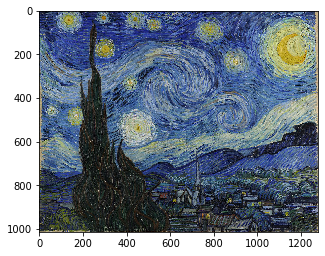

In [21]:
princess = load_img('/content/drive/My Drive/MML/image/style/The Starry Night painting.jpg')
print(princess.shape)
starry = tf.image.resize(princess, [256, 256])
img = mpimg.imread('/content/drive/My Drive/MML/image/style/The Starry Night painting.jpg')
plt.figure(figsize=(5,8))
plt.imshow(img)
#imshow(bird.numpy().astype(np.uint8))

In [0]:
def resize_and_pair(ele):
  image = ele['image']
  image = tf.image.resize(image, (256, 256))
  return image, image

In [0]:
import tensorflow_datasets as tfds

In [0]:
coco_2017 = tfds.load('coco/2017', split=tfds.Split.TRAIN)

In [0]:
images = coco_2017.map(resize_and_pair, num_parallel_calls=tf.data.experimental.AUTOTUNE)
images = images.batch(4).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [0]:
%load_ext tensorboard
import datetime
import json

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
model = transformer_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss=losses.full_loss(princess))
model.fit(images, epochs=2, steps_per_epoch=None, use_multiprocessing=False)

created
Epoch 1/2
   8607/Unknown - 7659s 890ms/step - loss: 626802.1147

In [0]:
# save your trained model
model.save('/content/drive/My Drive/MML/vgg19_tf2/starry_resizestyle__nins_vgg16_coco_test_17_weight0.h5')

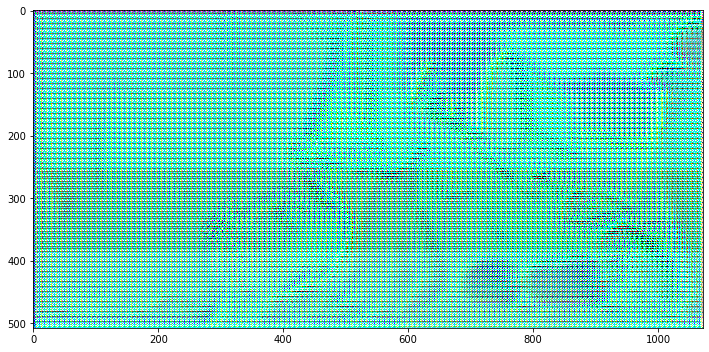

In [0]:
bird = load_img('/content/drive/My Drive/MML/copy/8.PNG')
results = model.predict(bird)
plt.figure()
plt.imshow(results[0].astype(np.uint8))

In [0]:
from moviepy.editor import VideoFileClip
import cv2
import glob

In [0]:
my_clip = VideoFileClip('/content/drive/My Drive/MML/image/content/movie/The Nutcracker and the Mouse King_clip.mp4', audio=False)
print("Duration of video : ", my_clip.duration)
print("FPS : ", my_clip.fps)

Duration of video :  9.12
FPS :  25.0


In [0]:
OUTPUT_DIR = '/content/drive/My Drive/MML/image/content/movie/stylized_movie/image'
i = 0
for frame in my_clip.iter_frames(fps=25, dtype='uint8'):
  output_path = os.path.join(OUTPUT_DIR, str(i)+'.jpg')
  frame_tensor = tf.convert_to_tensor(frame)
  frame_tensor = frame_tensor[tf.newaxis, :]
  frame_tensor = tf.cast(frame_tensor, tf.float32)
  stylized_image = model.predict(frame_tensor)
  save_image(stylized_image[0].astype(np.uint8), output_path)
  i += 1

In [0]:
img_array = []
for filename in glob.glob('/content/drive/My Drive/MML/image/content/movie/stylized_movie/image/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('/content/drive/My Drive/MML/image/content/movie/stylized_movie/dance_stylized_vgg16_0.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()